In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import numpy as np

In [2]:
df = pd.read_csv('datapl.csv', header=0)

In [3]:
df.head()

,Nama,Klub,Kebangsaan,Minutes Played,Passing,Tackles,Shots,Interception,Keterangan
0,Rodri,Manchester City,Spanyol,2887,2865,72,45,28,DMF
1,Pierre-Emile Højbjerg,Tottenham Hotspur,Denmark,3198,2531,78,31,48,DMF
2,Jordan Henderson,Liverpool,Inggris,2603,2157,36,31,23,CMF
3,Declan Rice,West Ham United,Inggris,3178,2153,80,26,63,DMF
4,Rúben Neves,Wolverhampton Wanderers,Portugal,2662,1929,74,20,41,DMF


In [4]:
labelencoder = LabelEncoder()

In [5]:
df['Nama'] = labelencoder.fit_transform(df['Nama'])
df['Klub'] = labelencoder.fit_transform(df['Klub'])
df['Kebangsaan'] = labelencoder.fit_transform(df['Kebangsaan'])
df['Keterangan'] = labelencoder.fit_transform(df['Keterangan'])

In [6]:
df.head()

,Nama,Klub,Kebangsaan,Minutes Played,Passing,Tackles,Shots,Interception,Keterangan
0,156,11,34,2887,2865,72,45,28,2
1,154,16,5,3198,2531,78,31,48,2
2,87,10,10,2603,2157,36,31,23,1
3,37,18,10,3178,2153,80,26,63,2
4,163,19,27,2662,1929,74,20,41,2


In [7]:
X = df[['Nama','Klub','Kebangsaan','Minutes Played','Passing','Tackles','Shots','Interception']]

In [8]:
y = df.Keterangan

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
clf = svm.SVC(kernel='linear', C=0.1, probability=True, verbose=True)
print(clf)

SVC(C=0.1, kernel='linear', probability=True, verbose=True)


In [11]:
clf = clf.fit(X_train, y_train)
print('w = ', clf.coef_)
print('b = ', clf.intercept_)

print(clf.verbose)

[LibSVM]w =  [[ 2.40375375e-03 -1.66698453e-01  5.25622421e-02  1.13922509e-03
  -6.71892757e-03 -6.00444948e-02  2.87283972e-01 -2.76199536e-01]
 [ 6.34739733e-03  3.70692860e-02 -3.83310989e-02 -3.20100171e-03
  -7.22764171e-04 -1.50489748e-01  6.63806898e-01 -4.32803982e-01]
 [ 2.22089636e-04  1.10963689e-02 -4.65318085e-02  5.62405251e-04
  -5.20765654e-04 -1.05266463e-01  2.03769456e-01 -1.05323202e-01]]
b =  [ 0.28241646 -0.5182567   1.22718751]
True


In [12]:
print(clf.predict(X_train))

[0 2 1 2 1 2 0 2 2 1 1 0 2 2 2 1 2 1 2 1 1 0 2 0 2 1 0 2 1 2 1 1 1 1 0 2 0
 0 1 2 2 2 1 0 2 1 2 0 2 0 0 0 2 1 2 1 2 0 1 2 1 2 2 0 1 2 2 2 2 2 1 0 1 2
 1 1 2 2 1 0 1 2 2 1 0 1 0 2 1 2 2 0 2 2 2 2 1 2 0 2 0 0 0 0 2 1 1 2 2 0 0
 1 2 1 2 2 2 1 0 2 2 0 0 0 1 0 2 2 1 0 0 0 0 1 2]


In [13]:
X_test.head()

,Nama,Klub,Kebangsaan,Minutes Played,Passing,Tackles,Shots,Interception
165,107,8,10,147,61,1,1,1
60,149,12,25,1354,877,13,32,13
33,135,17,25,3221,1144,53,25,30
72,137,10,9,1173,743,46,26,14
161,91,2,10,252,87,2,1,1


In [14]:
y_test.head()

165    1
60     0
33     1
72     1
161    1
Name: Keterangan, dtype: int64

In [15]:
hasilPrediksi = clf.predict(X_train)
print('Label Sebenarnya = ', y_train)
print('Hasil Prediksi = ', hasilPrediksi)
print(clf.predict_proba(X_train))

Label Sebenarnya =  151    1
177    2
28     1
112    2
185    1
      ..
47     0
75     0
178    2
61     0
93     2
Name: Keterangan, Length: 135, dtype: int64
Hasil Prediksi =  [0 2 1 2 1 2 0 2 2 1 1 0 2 2 2 1 2 1 2 1 1 0 2 0 2 1 0 2 1 2 1 1 1 1 0 2 0
 0 1 2 2 2 1 0 2 1 2 0 2 0 0 0 2 1 2 1 2 0 1 2 1 2 2 0 1 2 2 2 2 2 1 0 1 2
 1 1 2 2 1 0 1 2 2 1 0 1 0 2 1 2 2 0 2 2 2 2 1 2 0 2 0 0 0 0 2 1 1 2 2 0 0
 1 2 1 2 2 2 1 0 2 2 0 0 0 1 0 2 2 1 0 0 0 0 1 2]
[[3.82909176e-01 4.63324049e-01 1.53766774e-01]
 [2.47035939e-01 2.98621438e-01 4.54342623e-01]
 [2.94579416e-01 6.54233801e-01 5.11867837e-02]
 [2.17266228e-02 2.22395002e-01 7.55878375e-01]
 [1.84326839e-01 5.56709577e-01 2.58963584e-01]
 [2.43711092e-02 4.53409882e-01 5.22219009e-01]
 [8.75532502e-01 1.21222383e-01 3.24511517e-03]
 [2.16474722e-01 1.98454191e-01 5.85071087e-01]
 [8.54000517e-03 2.12335162e-01 7.79124833e-01]
 [7.90783603e-02 5.94052740e-01 3.26868899e-01]
 [1.23162171e-01 6.46600310e-01 2.30237519e-01]
 [8.33147709e-01

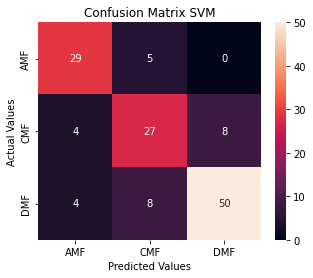

              precision    recall  f1-score   support

         AMF       0.78      0.85      0.82        34
         CMF       0.68      0.69      0.68        39
         DMF       0.86      0.81      0.83        62

    accuracy                           0.79       135
   macro avg       0.77      0.78      0.78       135
weighted avg       0.79      0.79      0.79       135



In [16]:
cm = confusion_matrix(y_train, hasilPrediksi)
cm_df = pd.DataFrame(cm,
                     index = ['AMF','CMF','DMF'],
                     columns = ['AMF','CMF','DMF'])
plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix SVM')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
target = ['AMF', 'CMF', 'DMF']
print(classification_report(y_train, hasilPrediksi, target_names=target))

In [17]:
proba = clf.predict_proba(X_test)
print(proba)

[[2.32340731e-01 4.61638409e-01 3.06020860e-01]
 [4.62341144e-01 5.15256952e-01 2.24019040e-02]
 [9.56714929e-04 1.72382173e-01 8.26661113e-01]
 [1.52672937e-01 4.79845394e-01 3.67481669e-01]
 [2.42310557e-01 4.08517976e-01 3.49171467e-01]
 [2.46378042e-01 4.57013576e-01 2.96608382e-01]
 [8.84184076e-01 1.15199005e-01 6.16918487e-04]
 [2.87321192e-01 3.59113031e-01 3.53565777e-01]
 [2.74978443e-01 2.96028910e-01 4.28992647e-01]
 [8.32056990e-05 1.32764669e-02 9.86640327e-01]
 [4.51224252e-01 4.25499070e-01 1.23276678e-01]
 [4.91705165e-02 4.46369531e-01 5.04459952e-01]
 [1.88154664e-01 4.90229958e-01 3.21615378e-01]
 [2.45775900e-02 2.66837804e-01 7.08584606e-01]
 [2.86245430e-01 5.21363309e-01 1.92391262e-01]
 [8.44312568e-01 1.48970065e-01 6.71736657e-03]
 [1.01970096e-05 4.35267704e-03 9.95637126e-01]
 [9.94494223e-01 5.50537431e-03 4.02464602e-07]
 [1.15331557e-05 4.33965010e-03 9.95648817e-01]
 [8.65783866e-01 1.28739265e-01 5.47686927e-03]
 [4.23073952e-01 3.87732533e-01 1.891935

In [18]:
hasil = pd.DataFrame(hasilPrediksi, columns = ['Predicted'])
hasil.head()

,Predicted
0,0
1,2
2,1
3,2
4,1


In [19]:
hasilPrediksi = clf.predict(X_test)
print('Label Sebenarnya = ', y_test)
print('Hasil Prediksi = ', hasilPrediksi)

Label Sebenarnya =  165    1
60     0
33     1
72     1
161    1
176    1
57     0
142    1
188    1
10     2
152    0
157    2
130    2
102    1
146    1
111    0
20     2
19     0
31     2
69     0
154    1
8      2
127    2
153    1
76     2
44     2
41     2
98     1
104    1
0      2
86     0
63     2
158    1
78     1
91     0
42     2
164    1
49     0
27     2
90     2
21     2
88     0
107    0
1      2
120    0
179    0
11     1
7      0
121    1
160    2
92     0
190    1
81     2
65     2
116    1
82     2
74     2
174    2
Name: Keterangan, dtype: int64
Hasil Prediksi =  [1 0 2 1 0 1 0 1 2 2 0 2 1 2 1 0 2 0 2 0 0 2 2 2 2 2 2 2 1 2 0 2 2 1 1 2 1
 0 2 2 2 0 0 2 0 1 1 1 2 1 0 0 2 2 2 2 2 1]


In [20]:
cm = confusion_matrix(y_test, hasilPrediksi)

In [21]:
cm_df = pd.DataFrame(cm,
                     index = ['AMF','CMF','DMF'],
                     columns = ['AMF','CMF','DMF'])

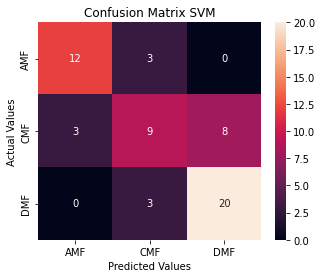

In [22]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix SVM')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [23]:
print(cm_df)

     AMF  CMF  DMF
AMF   12    3    0
CMF    3    9    8
DMF    0    3   20


In [24]:
target = ['AMF', 'CMF', 'DMF']
print(classification_report(y_test, hasilPrediksi, target_names=target))

              precision    recall  f1-score   support

         AMF       0.80      0.80      0.80        15
         CMF       0.60      0.45      0.51        20
         DMF       0.71      0.87      0.78        23

    accuracy                           0.71        58
   macro avg       0.70      0.71      0.70        58
weighted avg       0.70      0.71      0.70        58



In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=5)
scores

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

array([0.75      , 0.83333333, 0.58333333, 0.72727273, 0.63636364])

In [26]:
print(cross_val_score)

<function cross_val_score at 0x7f8cef8f0b00>


In [27]:
roc_auc_score(y_test,proba,multi_class='ovr')

0.8895265844084427

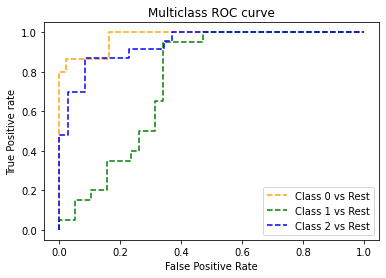

In [28]:
fpr = {}
tpr = {}
thresh = {}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(
        y_test, proba[:, i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC', dpi=300)

In [29]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test,hasilPrediksi))

0.29310344827586204


In [38]:
baru = [[10, 1, 3, 1056, 255, 8, 20, 5]]

In [39]:
hasilPrediksi = clf.predict(baru)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [40]:
prediction = clf.predict(baru)
output = int(prediction[0])
probas = clf.predict_proba(baru)
output_probability = float(probas[:, output].round(3))
# output dictionary
konsentrasi = {0: "AMF", 1: "CMF", 2: "DMF"}
# show results
result = {"prediction": konsentrasi[output],
          "confidence_score": output_probability}

print(result)

{'prediction': 'AMF', 'confidence_score': 0.782}


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [42]:
import pickle
filename = 'modelSVMpremierleague'
pickle.dump(clf, open(filename, 'wb'))

In [44]:
loaded_model = pickle.load(open('modelSVMpremierleague','rb'))